In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bio = pd.read_csv('https://raw.githubusercontent.com/J031F/renewable_energy/main/bio_energy.csv', index_col=0)
hydro = pd.read_csv('https://raw.githubusercontent.com/J031F/renewable_energy/main/hydro_energy.csv', index_col=0)
wind = pd.read_csv('https://raw.githubusercontent.com/J031F/renewable_energy/main/wind_energy.csv', index_col=0)
solar = pd.read_csv('https://raw.githubusercontent.com/J031F/renewable_energy/main/solar_energy.csv', index_col=0)

#importa todos os arquivos e os converte para o tipo DataFrame e retira apenas as coluas 2018 - 2021
total_solar_energy = pd.DataFrame(solar).loc[:,"2018":"2021"]

#a mesma coisa mas dessa vez retirando apenas a linha 'World' e a convertendo pra uma lista
solar_energy = total_solar_energy.loc[:,"2018":"2021"].loc["World","2018":"2021"].tolist()
wind_energy = pd.DataFrame(wind).loc["World","2018":"2021"].tolist()
hydro_energy = pd.DataFrame(hydro).loc["World","2018":"2021"].tolist()
bio_energy = pd.DataFrame(bio).loc["World","2018":"2021"].tolist()

#jogando tudo em uma lista para facilitar nossa vida na hora de plotar o grafico
continents_solar_energy = []
continents_solar_energy.append(total_solar_energy.loc["Oceania"].tolist())
continents_solar_energy.append(total_solar_energy.loc["S America"].tolist())
continents_solar_energy.append(total_solar_energy.loc["Africa"].tolist())
continents_solar_energy.append(total_solar_energy.loc["N America"].tolist())
continents_solar_energy.append(total_solar_energy.loc["Asia"].tolist())


def convert (a):#função
    a = [value.replace(" ", "") for value in a]#retira espaços em branco
    a = [int(value) for value in a]#transforma em inteiro
    a = [value / 1000 for value in a]#divide por mil para ajudar visualização
    return a



# os dados foram tirados de um pdf, estão como strings e com espaços em branco em meio ao valores
# convert retira todos os espaços em branco, tranforma-os em inteiro e os divide por mil
wind_energy = convert(wind_energy)
solar_energy = convert(solar_energy)
hydro_energy = convert(hydro_energy)
bio_energy = convert(bio_energy)


converted_continents = list(map(convert, continents_solar_energy))
 
# # #extrai o nomes de todas as colunas
years = total_solar_energy.columns

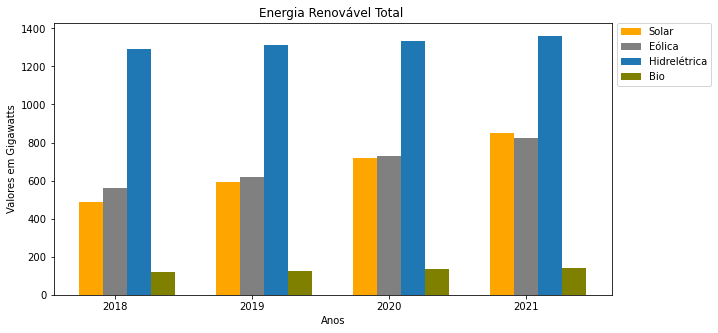

In [2]:
#largura e posição de cada barra
width = 0.35
x_axis = np.arange(0, len(years)*2, 2)

#utilizamos para definir o tamanho do grafico
fig,ax=plt.subplots()
fig.set_size_inches(10,5)


#define, respectivamente, posição, conteudo,largura e cor
bar1 = plt.bar(x_axis, solar_energy, width, color = 'orange')
bar2 = plt.bar(x_axis+width, wind_energy, width, color='grey')
bar3 = plt.bar(x_axis+width*2, hydro_energy, width)
bar4 = plt.bar(x_axis+width*3, bio_energy, width, color = 'olive')


#legendas
plt.xlabel("Anos")
plt.ylabel('Valores em Gigawatts')
plt.title("Energia Renovável Total ")
plt.legend((bar1, bar2, bar3, bar4), ('Solar', 'Eólica', 'Hidrelétrica', 'Bio'), bbox_to_anchor=(1,1.02), loc='upper left')

#posição legendas eixo X
plt.xticks(x_axis+width, years)
plt.show()

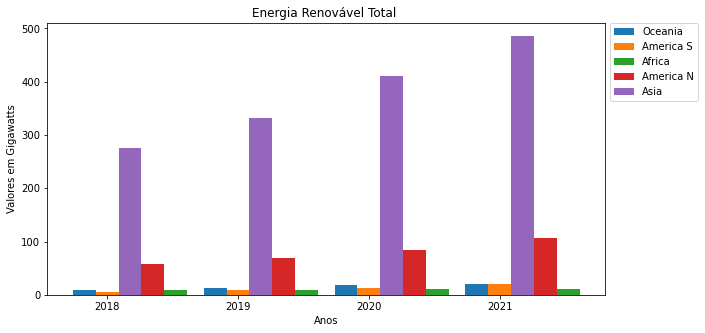

In [3]:
#utilizamos para definir o tamanho do grafico
fig,ax=plt.subplots()
fig.set_size_inches(10,5)


# [Oceania, S America, Africa, N America, Asia]
# define o que terá e como será cada barra em cada  

bar1 = plt.bar(x_axis, converted_continents[0], width)
bar2 = plt.bar(x_axis+width, converted_continents[1], width)
bar3 = plt.bar(x_axis+width*4, converted_continents[2], width)
bar4 = plt.bar(x_axis+width*3, converted_continents[3], width)
bar5 = plt.bar(x_axis+width*2, converted_continents[4], width)

#legendas
plt.xlabel("Anos")
plt.ylabel('Valores em Gigawatts')
plt.title("Energia Renovável Total ")
plt.legend((bar1, bar2, bar3, bar4, bar5), ("Oceania", "America S", "Africa", "America N", "Asia"), bbox_to_anchor=(1,1.02), loc='upper left')

#posição legendas eixo X
plt.xticks(x_axis+width, years)
plt.show()